##Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#sklearn
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, StandardScaler, Normalizer, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, roc_curve, auc 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score


In [109]:
#глубокое обучение
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Input, Normalization
import tensorflow.keras.regularizers
from tensorflow import keras

In [6]:
# функция для отображения фактического значения и предсказанного
def chart_predict_true(X_test, y_test, test_predictions):
    a = plt.axes(aspect='equal')
    plt.scatter(y_test, test_predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    lims = [0, 1]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

In [7]:
import joblib

In [8]:
import datetime

In [9]:
%matplotlib inline

##Загрузим экспериментальные данные по композитам

In [10]:
path = "/content/drive/MyDrive/data/X_bp.xlsx"
path = "/content/drive/MyDrive/data/X_nup.xlsx"

In [11]:
from google.colab import files
xbp = pd.read_excel('/content/drive/MyDrive/data/X_bp.xlsx')
xnup = pd.read_excel('/content/drive/MyDrive/data/X_nup.xlsx')

In [12]:
xbp

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [13]:
xnup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.000000,57.000000
1,1.0,0.0,4.000000,60.000000
2,2.0,0.0,4.000000,70.000000
3,3.0,0.0,5.000000,47.000000
4,4.0,0.0,5.000000,57.000000
...,...,...,...,...
1035,1035.0,90.0,8.088111,47.759177
1036,1036.0,90.0,7.619138,66.931932
1037,1037.0,90.0,9.800926,72.858286
1038,1038.0,90.0,10.079859,65.519479


##Соеденим оба датасета в один и откидываем первый столбец

In [14]:
xbp.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
xnup.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [15]:
df = pd.concat([xbp, xnup], axis=1, join='inner')
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


##Проведем разведочный анализ данных

In [16]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


##Выполним проверку полученного датсета на пропуски

In [17]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропуски  отсутствуют

##Гистограммы распределения каждой из переменной, диаграммы ящика с усами

In [18]:
def hist_and_boxplot(df: pd.DataFrame) -> None:
  for i_column in df.columns:
    print('{column}:'.format(column=i_column))

    series = df[i_column]
    sns.set_style("darkgrid")
    sns.kdeplot(data=series, shade=True, palette='dark')
    plt.show()

    sns.boxplot(x=series)
    plt.show()

Соотношение матрица-наполнитель:


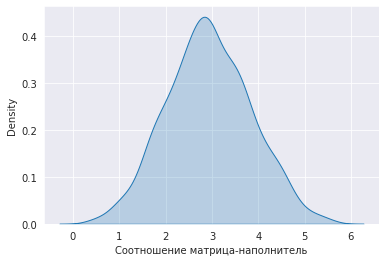

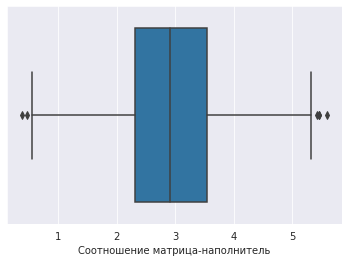

Плотность, кг/м3:


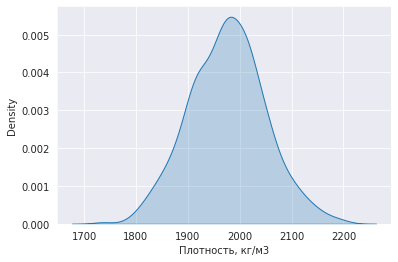

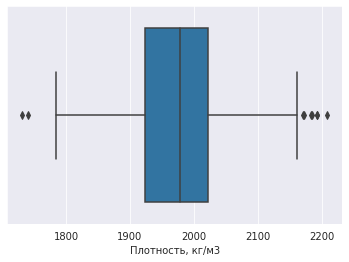

модуль упругости, ГПа:


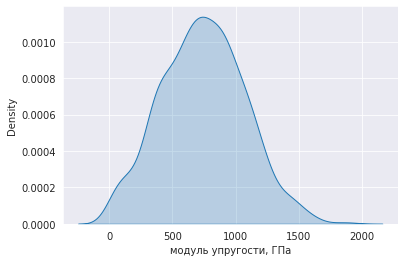

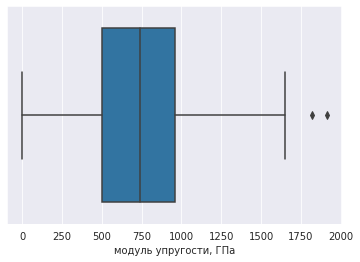

Количество отвердителя, м.%:


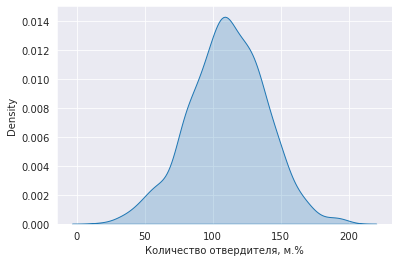

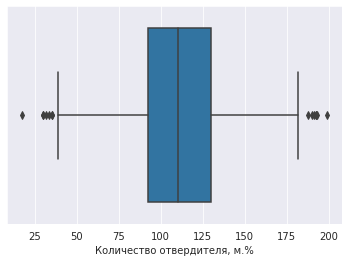

Содержание эпоксидных групп,%_2:


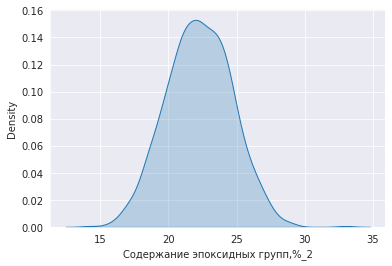

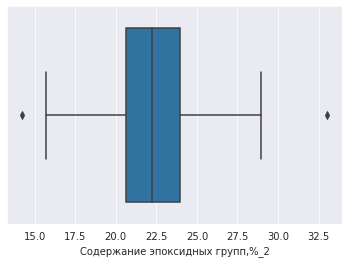

Температура вспышки, С_2:


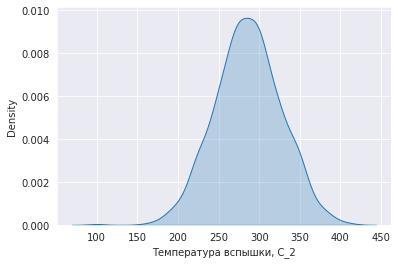

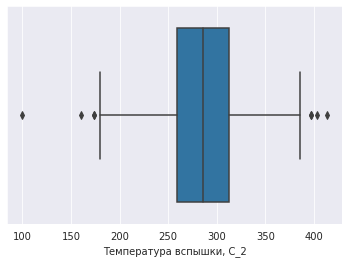

Поверхностная плотность, г/м2:


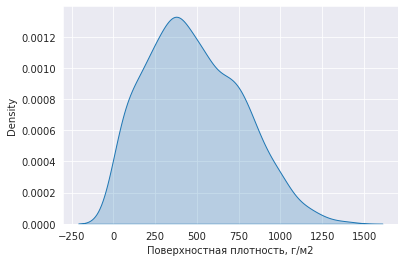

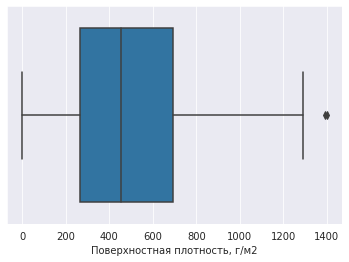

Модуль упругости при растяжении, ГПа:


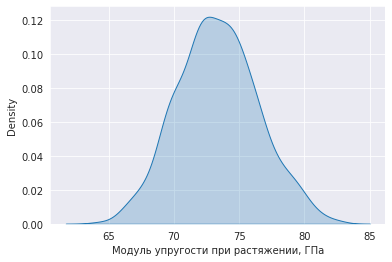

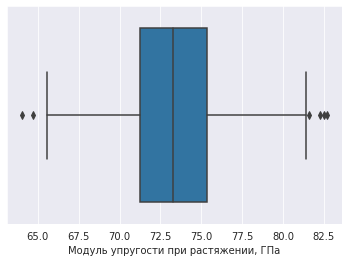

Прочность при растяжении, МПа:


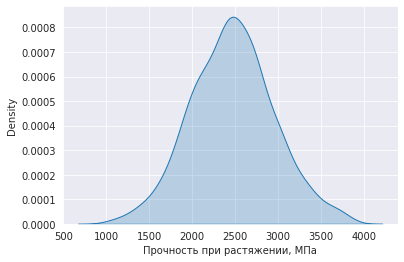

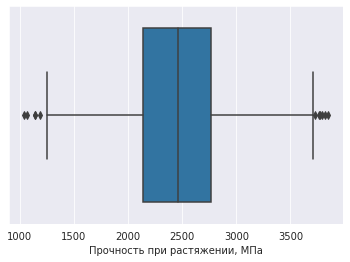

Потребление смолы, г/м2:


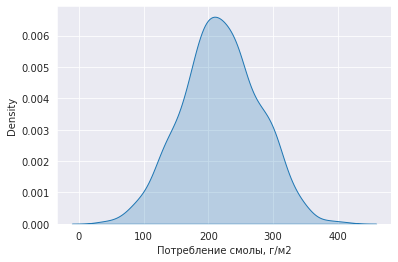

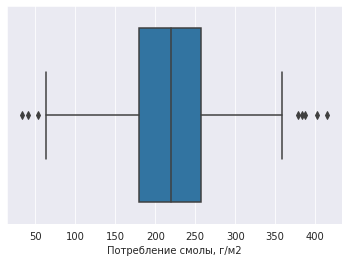

Угол нашивки, град:


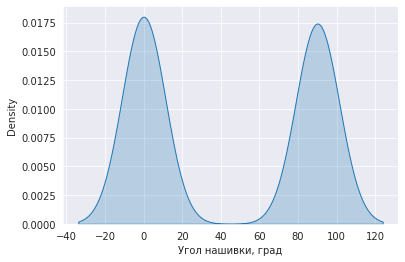

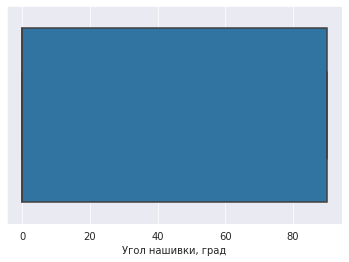

Шаг нашивки:


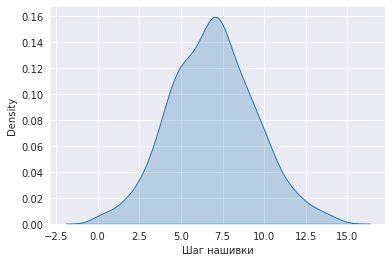

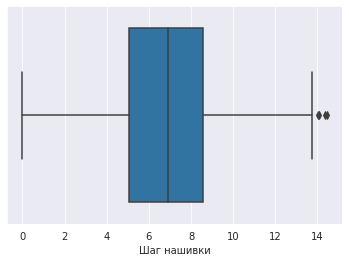

Плотность нашивки:


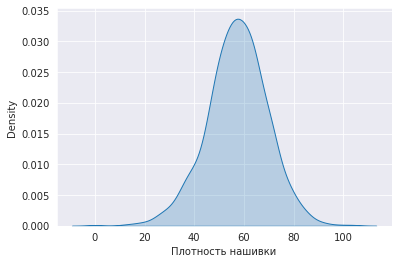

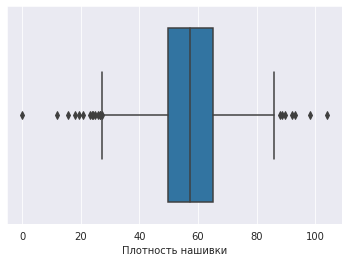

In [20]:
hist_and_boxplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07c5aa5ed0>,
      dtype=object)

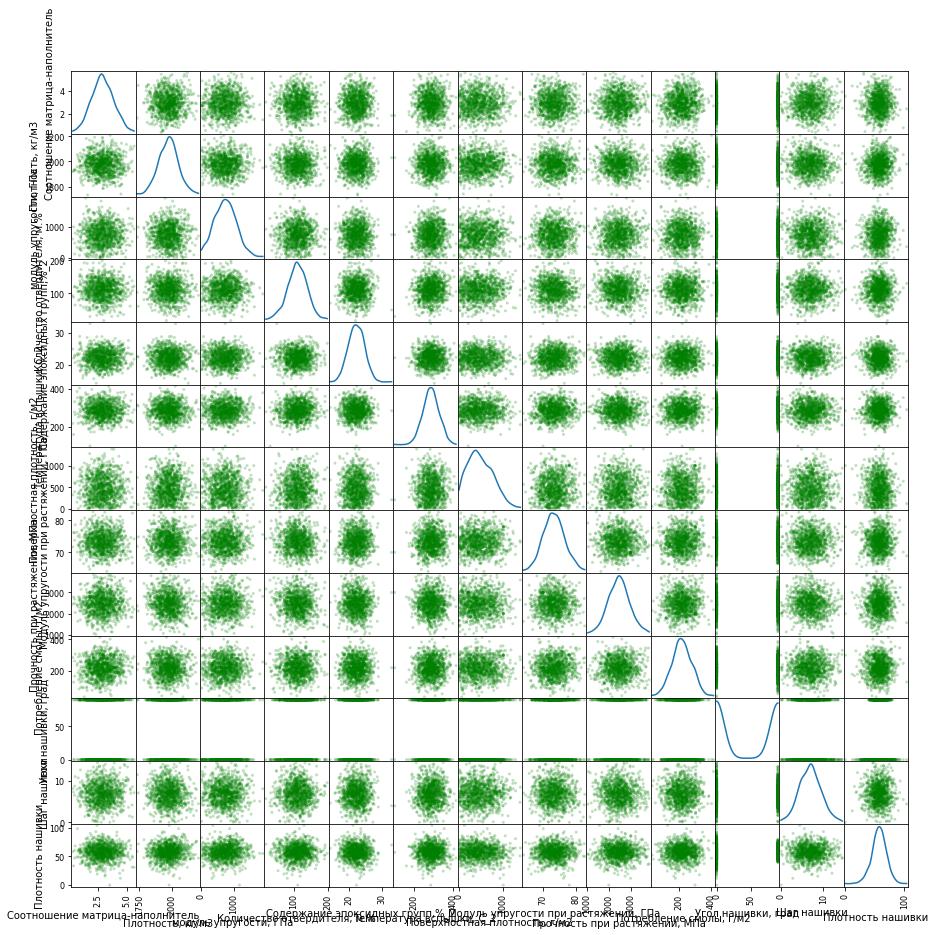

In [19]:
pd.plotting.scatter_matrix(df, alpha=0.25, figsize=(15, 15), diagonal='kde', color ='green')

По графику видно, что присутствуют выбросы. Некоторые точки стоят вдалике от основных облоков.

Создадим теповую матрицу

In [21]:
correlation = df.corr()

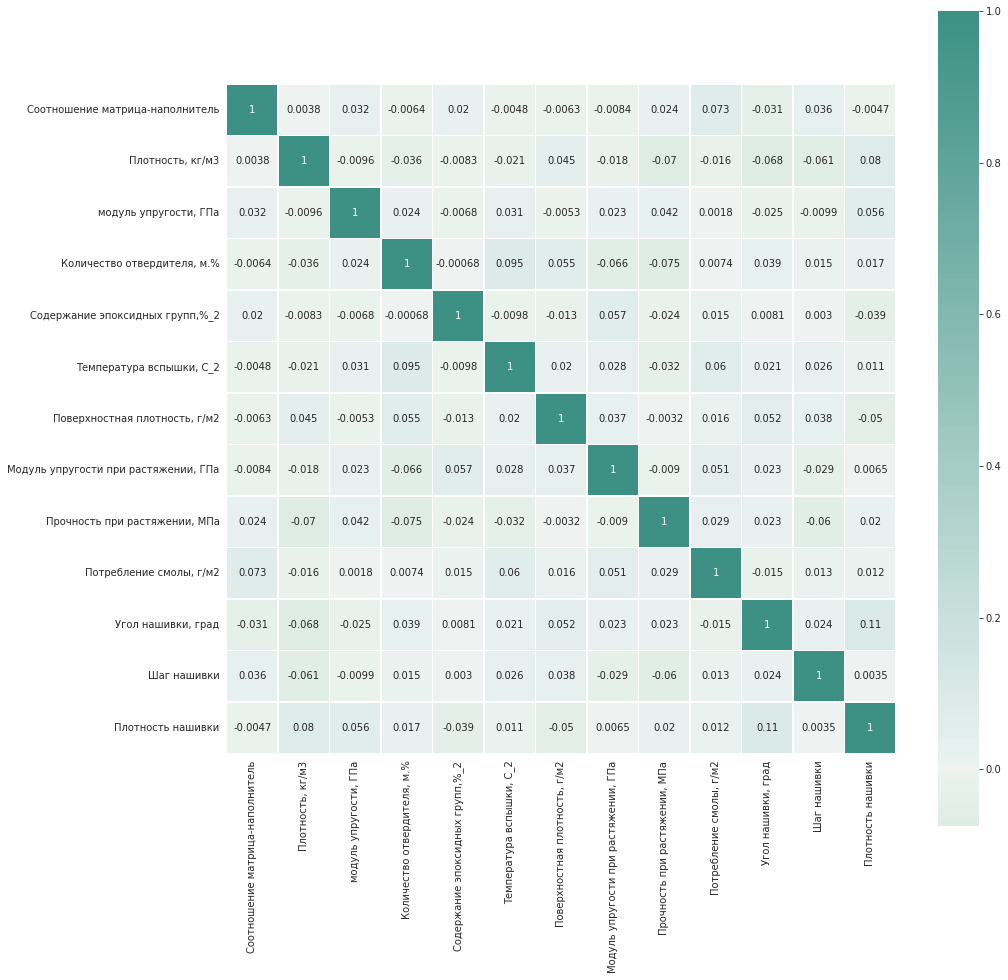

In [22]:
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Создаем полотно для отображения графика
f, ax = plt.subplots(figsize=(15, 15))

# Зададим цветовую гамму
cmap = sns.diverging_palette(150, 175, s=80, l=55, n=9, as_cmap=True)

# Визуализируем данные кореляции 
sns.heatmap( correlation, ax = ax, cmap = cmap, linewidths = 0.5, annot = True, center = 0, square = True);

Попарные графики рассеяния показывают слабую зависимость между перменными

ВЫПОЛНИМ ПОДГОТОВКУ ДАННЫХ ДЛЯ ДАЛЬНЕЙШЕГО АНАЛИЗА

Соотношение матрица-наполнитель: 3s=0 iq=6


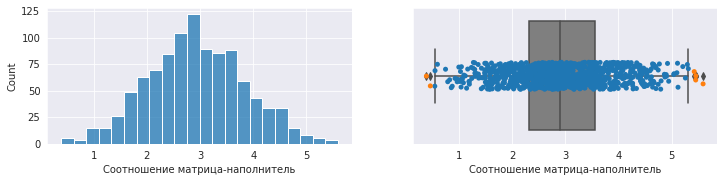

Плотность, кг/м3: 3s=3 iq=9


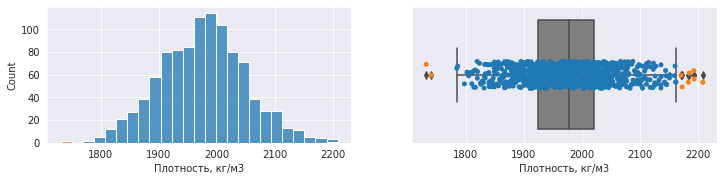

модуль упругости, ГПа: 3s=2 iq=2


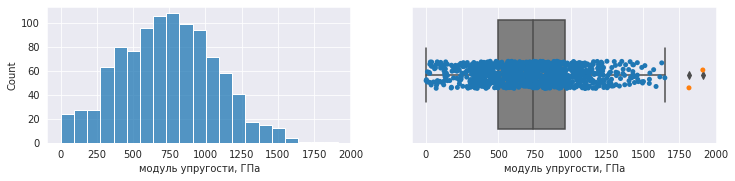

Количество отвердителя, м.%: 3s=2 iq=14


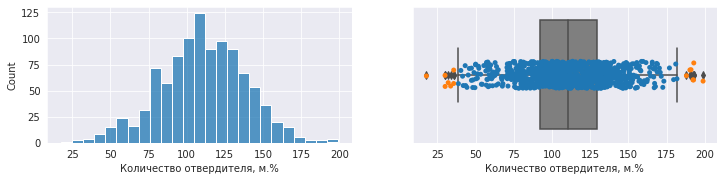

Содержание эпоксидных групп,%_2: 3s=2 iq=2


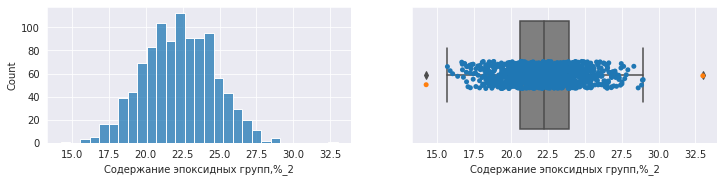

Температура вспышки, С_2: 3s=3 iq=8


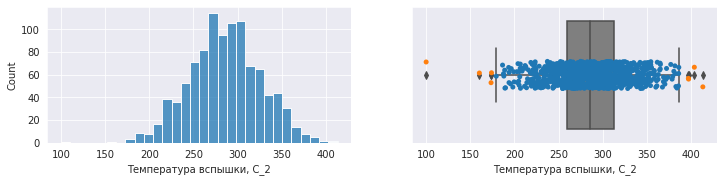

Поверхностная плотность, г/м2: 3s=2 iq=2


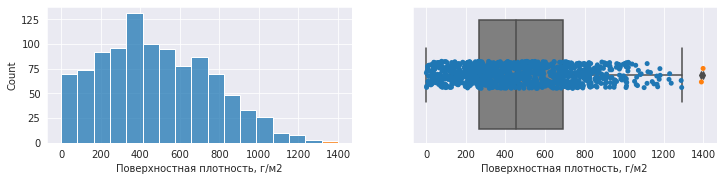

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


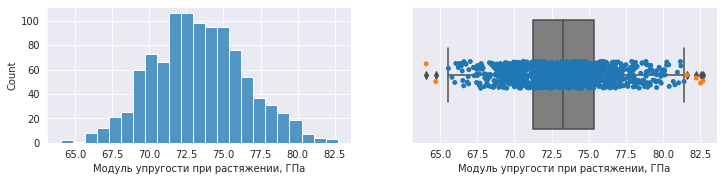

Прочность при растяжении, МПа: 3s=0 iq=11


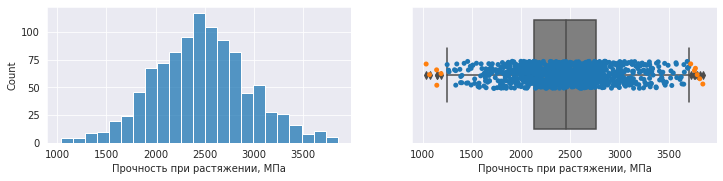

Потребление смолы, г/м2: 3s=3 iq=8


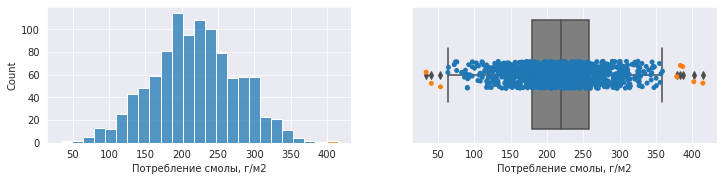

Угол нашивки, град: 3s=0 iq=0


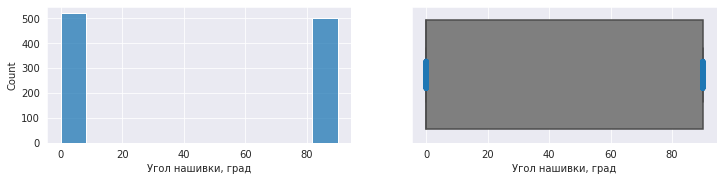

Шаг нашивки: 3s=0 iq=4


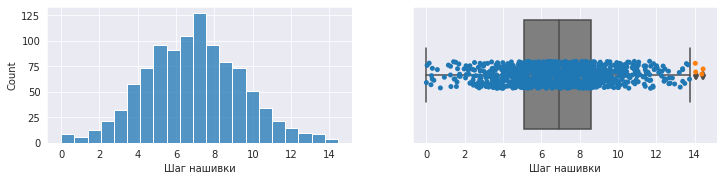

Плотность нашивки: 3s=7 iq=21


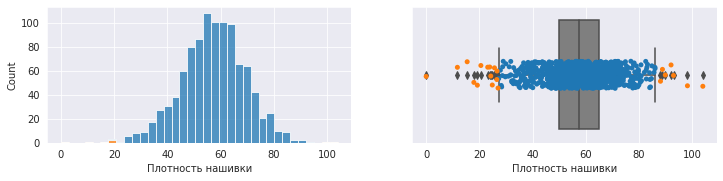

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [23]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Поскольку выбросов меньше при определении методом 3-х сигм, то и удаление выбросов произведем по этому методу, что бы потерять как можно меньше значимой информации

In [24]:
# Удалить выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [25]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Выполним нормализацию данных

In [26]:
scaler = MinMaxScaler()

norm_df=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 


In [27]:
norm_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.489568,0.467648,0.447024,0.496427,0.493216,0.488654,0.371301,0.497322,0.507902,0.512370,0.496000,0.477193,0.507027
std,0.174687,0.178696,0.198876,0.171089,0.179818,0.174792,0.215155,0.167158,0.172506,0.170432,0.500234,0.177586,0.163634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370964,0.340831,0.302576,0.384097,0.368597,0.371985,0.206374,0.386234,0.390414,0.401220,0.000000,0.351886,0.405037
50%,0.484284,0.472347,0.448525,0.495388,0.492154,0.488205,0.348844,0.492609,0.504890,0.513653,0.000000,0.477999,0.509730
75%,0.608289,0.579727,0.582408,0.613258,0.624396,0.606271,0.535295,0.605138,0.612932,0.625772,1.000000,0.593714,0.612766
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
norm_df.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.162230,0.319194,0.698235,0.517418,0.0,0.275109,0.544652
3,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.162230,0.319194,0.698235,0.517418,0.0,0.344539,0.365074
4,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.162230,0.319194,0.698235,0.517418,0.0,0.344539,0.503211
5,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.162230,0.319194,0.698235,0.517418,0.0,0.344539,0.544652
6,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.162230,0.319194,0.698235,0.517418,0.0,0.344539,0.682789
7,0.417519,0.282954,0.323358,0.502800,0.495653,0.482823,0.293938,0.587607,0.271429,0.228280,0.0,0.483401,0.365074
8,0.608883,0.356437,0.538297,0.608021,0.418887,0.549664,0.293938,0.587607,0.271429,0.228280,0.0,0.483401,0.503211
9,0.604139,0.772842,0.861312,0.608021,0.418887,0.549664,0.782031,0.748655,0.342563,0.748729,0.0,0.483401,0.544652
10,0.486373,0.919808,0.565012,0.608021,0.418887,0.549664,0.782031,0.748655,0.342563,0.748729,0.0,0.483401,0.682789
11,0.478238,0.503403,0.986997,0.608021,0.418887,0.549664,0.782031,0.748655,0.342563,0.748729,0.0,0.622262,0.365074


СОЗДАДИМ МОДЕЛИ ПРОГНОЗА МОДУЛЕЙ УПРУГОСТИ И ПРОЧНОСТИ ПРИ РАСТЯЖЕНИИ

МОДУЛЬ УПРУГОСТИ

Модель - линейная регрессия

In [29]:
# Удаляем зависимые параметры
df_learning=norm_df.drop(['Прочность при растяжении, МПа'], axis=1)

In [30]:
# Делим датасет на целевые переменные y и набор входных переменных X
X = df_learning
y = X.pop('Модуль упругости при растяжении, ГПа')

In [77]:
# Создадим функцию для рассчета МАРЕ, т.к. хотим посмотреть не только прогноз ошибок, но и точность модели
def mean_absolute_percentage_error(y_train, pred):
    return 100 * (np.abs(y_train - pred) / y_train).mean()

In [41]:
# Разделяем выборки на обучающую и тестовую
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.3)

In [42]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(Xtrn, Ytrn)
pred = lin_reg_mod.predict(Xtest)

In [78]:
test_set_rmse = (np.sqrt(mean_squared_error(Ytest, pred)))
test_set_r2 = r2_score(Ytest, pred)
accur = 100 - mean_absolute_percentage_error(Ytest, pred)

In [79]:
print('Среднеквадратичная ошибка - ', test_set_rmse)
print('Коэфициент детерминации - ', test_set_r2)
print('Точность - ', accur, '%')

Среднеквадратичная ошибка -  0.1566792084714014
Коэфициент детерминации -  -0.01619201139595594
Точность -  67.46961522978057 %


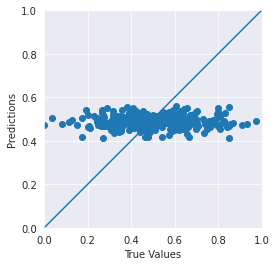

In [36]:
test_predictions = lin_reg_mod.predict(Xtest).flatten()
chart_predict_true(Xtest, Ytest, test_predictions)

Модель - К-ближайших соседей

In [37]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(Xtrn, Ytrn)
y_pred_knn = knn.predict(Xtest)

In [80]:
# Оценка эффективности модели
mse = (np.sqrt(mean_squared_error(Ytest, y_pred_knn)))
r2 = r2_score(Ytest, y_pred_knn)
accur = 100 - mean_absolute_percentage_error(Ytest, y_pred_knn)

print('Среднеквадратичная ошибка - ', mse)
print('Коэфициент детерминации - ', r2)
print('Точность - ', accur, '%')

Среднеквадратичная ошибка -  0.16904296799993562
Коэфициент детерминации -  -0.18289789062088624
Точность -  65.48569179785088 %


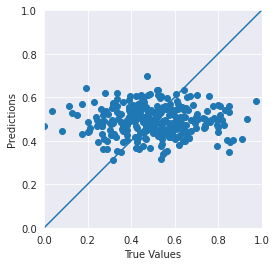

In [39]:
test_predictions = knn.predict(Xtest).flatten()
chart_predict_true(Xtest, Ytest, test_predictions)

Модель - случайный лес

In [48]:
model = RandomForestRegressor(n_estimators=2000, max_depth=18)
model.fit(Xtrn, Ytrn)
y_pred_forest = model.predict(Xtest)


In [81]:
# Оценка эффективности модели
mse = (np.sqrt(mean_squared_error(Ytest, y_pred_forest)))
r2 = r2_score(Ytest, y_pred_forest)
accur = 100 - mean_absolute_percentage_error(Ytest, y_pred_forest)

print('Среднеквадратичная ошибка - ', mse)
print('Коэфициент детерминации - ', r2)
print('Точность - ', accur, '%')

Среднеквадратичная ошибка -  0.15893730809213732
Коэфициент детерминации -  -0.04569431030090776
Точность -  67.57028239115407 %


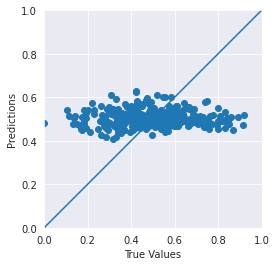

In [50]:
test_predictions = model.predict(Xtest).flatten()
chart_predict_true(Xtest, Ytest, test_predictions)

In [51]:
# Поиск лучших гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
from sklearn.model_selection import GridSearchCV

In [52]:
n_estimators = [3,5,9,11]
max_depth = [1,2,3,4,5]
min_samples_split = [10,20,30]
min_samples_leaf = [2,4,6]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(model, param_grid, cv = 10, verbose = 1, n_jobs=1)
gs.fit(Xtrn, Ytrn)
gs.best_params_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


{'bootstrap': True,
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 5}

МОДУЛЬ ПРОЧНОСТИ

Модель - линейная регрессия

In [82]:
# Удаляем зависимые параметры
df_learning=norm_df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

In [83]:
# Делим дасет на целевые переменные y и набор входных переменных X
X = df_learning
y = X.pop('Прочность при растяжении, МПа')

In [84]:
# Разделяем выборки на обучающую и тестовую
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.3)

In [85]:
# Создадим функцию для рассчета МАРЕ, т.к. хотим посмотреть не только прогноз ошибок, но и точность модели
def mean_absolute_percentage_error(y_train, pred):
    return 100 * (np.abs(y_train - pred) / y_train).mean()

In [86]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(Xtrn, Ytrn)
pred = lin_reg_mod.predict(Xtest)

In [87]:
# Оценим эффективность модели
test_set_rmse = (np.sqrt(mean_squared_error(Ytest, pred)))
test_set_r2 = r2_score(Ytest, pred)
accur = 100 - mean_absolute_percentage_error(Ytest, pred)

In [88]:
print('Среднеквадратичная ошибка - ', test_set_rmse)
print('Коэфициент детерминации - ', test_set_r2)
print('Точность - ', accur, '%')

Среднеквадратичная ошибка -  0.16763751800446028
Коэфициент детерминации -  0.014738274682774333
Точность -  64.76910365700874 %


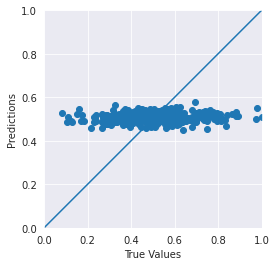

In [89]:
test_predictions = lin_reg_mod.predict(Xtest).flatten()
chart_predict_true(Xtest, Ytest, test_predictions)

Модель К-ближайших соседей

In [90]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(Xtrn, Ytrn)
y_pred_knn = knn.predict(Xtest)

In [91]:
# Оценка эффективности модели
mse = (np.sqrt(mean_squared_error(Ytest, y_pred_knn)))
r2 = r2_score(Ytest, y_pred_knn)
accur = 100 - mean_absolute_percentage_error(Ytest, y_pred_knn)

print('Среднеквадратичная ошибка - ', mse)
print('Коэфициент детерминации - ', r2)
print('Точность - ', accur, '%')

Среднеквадратичная ошибка -  0.17740829736278182
Коэфициент детерминации -  -0.10346108902697027
Точность -  63.33463979327355 %


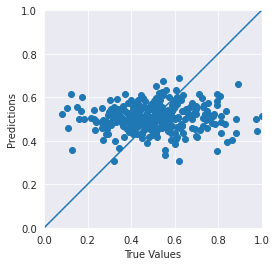

In [92]:
test_predictions = knn.predict(Xtest).flatten()
chart_predict_true(Xtest, Ytest, test_predictions)

Модель - Случайный лес

In [93]:
model = RandomForestRegressor(n_estimators=2000, max_depth=18)
model.fit(Xtrn, Ytrn)
y_pred_forest = model.predict(Xtest)

In [94]:
# Оценка эффективности модели
mse = (np.sqrt(mean_squared_error(Ytest, y_pred_forest)))
r2 = r2_score(Ytest, y_pred_forest)
accur = 100 - mean_absolute_percentage_error(Ytest, y_pred_forest)

print('Среднеквадратичная ошибка - ', mse)
print('Коэфициент детерминации - ', r2)
print('Точность - ', accur, '%')

Среднеквадратичная ошибка -  0.17262402116215833
Коэфициент детерминации -  -0.04474818574594308
Точность -  63.38700908002451 %


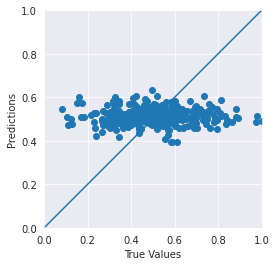

In [95]:
test_predictions = model.predict(Xtest).flatten()
chart_predict_true(Xtest, Ytest, test_predictions)

In [96]:
# Поиск лучших гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
n_estimators = [3,5,9,11]
max_depth = [1,2,3,4,5]
min_samples_split = [10,20,30]
min_samples_leaf = [2,4,6]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(model, param_grid, cv = 10, verbose = 1, n_jobs=1)
gs.fit(Xtrn, Ytrn)
gs.best_params_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


{'bootstrap': True,
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 5}

НЕЙРОННАЯ СЕТЬ 

In [150]:
import pandas as pd

In [100]:
Yn = df['Соотношение матрица-наполнитель']
Xn = df.drop(columns=['Соотношение матрица-наполнитель'])

In [101]:
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn,Yn, test_size=0.3, random_state=42)

In [98]:
print(tf.__version__)

2.8.2


In [125]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(24, activation='relu',
                 input_shape=(12,)),
  tf.keras.layers.Dense(12, activation='sigmoid'),
  tf.keras.layers.Dense(6, activation='sigmoid'),
  tf.keras.layers.Dense(1)
])

In [126]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',       
              metrics=['mae'])

In [127]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 24)                312       
                                                                 
 dense_17 (Dense)            (None, 12)                300       
                                                                 
 dense_18 (Dense)            (None, 6)                 78        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________


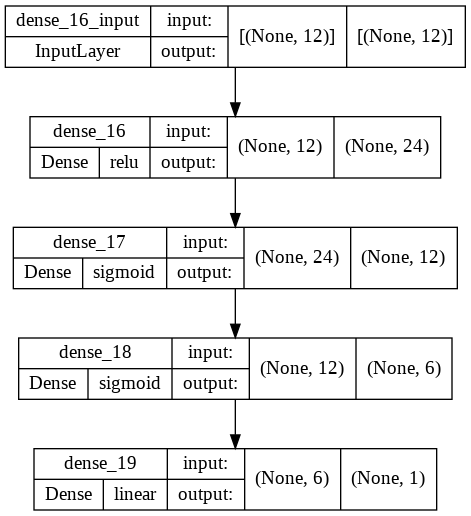

In [128]:
# Архитектура нейросети визуально
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [129]:
# Обучение нейросети
history = model.fit(
    Xn_train.values,
    Yn_train.values,
    epochs=100,
    verbose=1,
    validation_split = 0.4)


Epoch 1/100
14/14 [==============================] - 1s 14ms/step - loss: 3.8459 - mae: 1.7348 - val_loss: 2.1518 - val_mae: 1.2131
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 1.3313 - mae: 0.9450 - val_loss: 1.0665 - val_mae: 0.8040
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.8044 - mae: 0.7269 - val_loss: 0.8990 - val_mae: 0.7457
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7641 - mae: 0.7035 - val_loss: 0.8874 - val_mae: 0.7465
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7680 - mae: 0.7063 - val_loss: 0.8873 - val_mae: 0.7484
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.7680 - mae: 0.7058 - val_loss: 0.8873 - val_mae: 0.7467
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7640 - mae: 0.7044 - val_loss: 0.8905 - val_mae: 0.7446
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7644 - 

In [130]:
Yn_pred = model.predict(Xn_test)

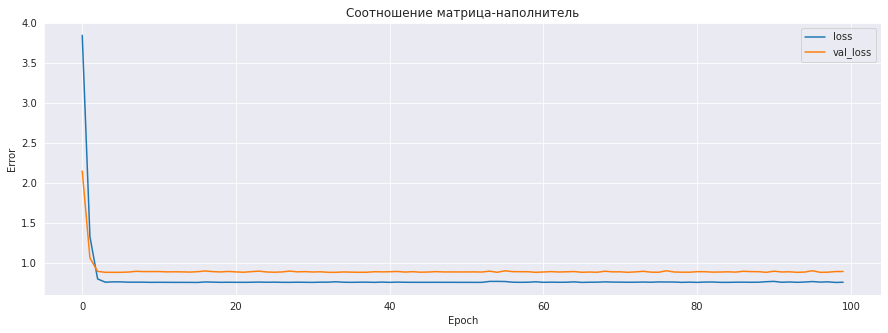

In [131]:
plt.figure(figsize=(15,5))
plt.title(str('Соотношение матрица-наполнитель'))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.ylim([0,0.8])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

Проверка построенной модели


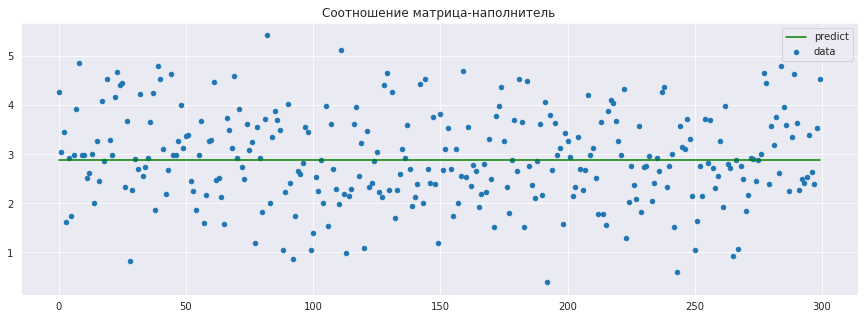

In [136]:
print('Проверка построенной модели')
plt.figure(figsize=(15,5))
plt.scatter(range(0, len(Yn_test)), Yn_test, label = 'data', s =20)
plt.plot(range(0, len(Yn_test)), Yn_pred, label = 'predict', color = 'green')
plt.title(str('Соотношение матрица-наполнитель'))
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


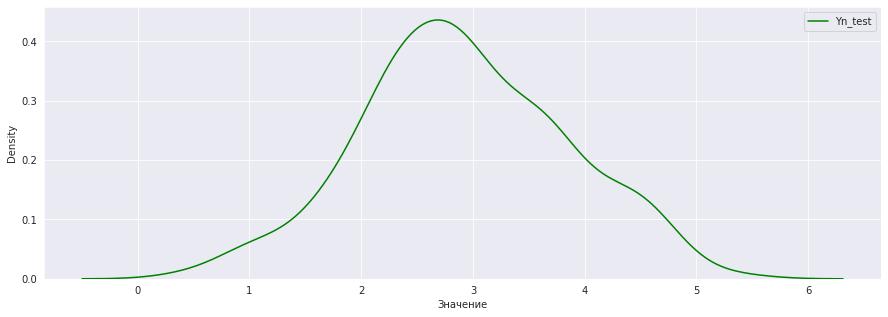

In [158]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=Yn_pred, label = 'Yn_pred', color='b')
sns.kdeplot(data=Yn_test, label = 'Yn_test', color='green')
plt.xlabel("Значение")
plt.legend()  
plt.show()

In [160]:
# Создадим функцию для рассчета МАРЕ, т.к. хотим посмотреть не только прогноз ошибок, но и точность модели
def mean_absolute_percentage_error(Yn_test, Yn_pred):
    return 100 * (np.abs(Yn_test - Yn_pred) / Yn_test)
    accur = 100 - mean_absolute_percentage_error(Yn_test, Yn_pred)

In [161]:
# Оценим эффективность модели
test_set_rmse = (np.sqrt(mean_squared_error(Yn_test, Yn_pred)))
test_set_r2 = r2_score(Yn_test, Yn_pred)

In [162]:
print('Среднеквадратичная ошибка - ', test_set_rmse)
print('Коэфициент детерминации - ', test_set_r2)
print('Точность - ', accur, '%')

Среднеквадратичная ошибка -  0.9243354275191141
Коэфициент детерминации -  -0.0013813076090694043
Точность -  63.38700908002451 %


ПРОВЕРКА РАБОТОСПОСОБНОСТИ МОДЕЛИ

In [163]:
#Ввод параметров и получение рекомендуемого значения

print("Введите параметры для прогноза соотношения 'Матрица-наполнитель'")
print("Плотность, кг/м3")
f1 = np.float64(input())
print("Модуль упругости, ГПа")
f2 = np.float64(input())
print("Количество отвердителя, м.%")
f3 = np.float64(input())
print("Содержание эпоксидных групп,%_2")
f4 = np.float64(input())
print("Температура вспышки, С_2")
f5 = np.float64(input())
print("Поверхностная плотность, г/м2")
f6 = np.float64(input())
print("Модуль упругости при растяжении, ГПа")
f7 = np.float64(input())
print("Прочность при растяжении, МПа")
f8 = np.float64(input())
print("Потребление смолы, г/м2")
f9 = np.float64(input())
print("Угол нашивки, град")
f10 = np.float64(input())
print("Шаг нашивки")
f11 = np.float64(input())
print("Плотность нашивки")
f12 = np.float64(input())

args = np.array([[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12]])

Введите параметры для прогноза соотношения 'Матрица-наполнитель'
Плотность, кг/м3
2000
Модуль упругости, ГПа
800
Количество отвердителя, м.%
50
Содержание эпоксидных групп,%_2
30
Температура вспышки, С_2
280
Поверхностная плотность, г/м2
210
Модуль упругости при растяжении, ГПа
73
Прочность при растяжении, МПа
2000
Потребление смолы, г/м2
200
Угол нашивки, град
90
Шаг нашивки
10
Плотность нашивки
65


In [168]:
rekom = model.predict(args)
print("Рекомендуемое соотношение 'Матрица-наполнитель' =", rekom)

Рекомендуемое соотношение 'Матрица-наполнитель' = [[2.8843265]]
